**Installing** **Transformers Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers torch scikit-learn pandas

Importing Necessary modules

In [ ]:
# import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import requests
from bs4 import BeautifulSoup
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | A last minute business trip ...
1,✅ Trip Verified | Overall I would say disapp...
2,Not Verified | LHR to Delhi in Business. Exce...
3,Not Verified | Efficient and Smooth flight fr...
4,✅ Trip Verified | Was told we can not take han...
...,...
3695,LHR-ATH-ATH June 2014. Both flights 1.5 hours ...
3696,Sao Paulo - London Heathrow Club World. Sat in...
3697,Travelled from Barbados to London Gatwick and ...
3698,LHR to BKK in club world over night flight. Lo...


In [ ]:
!mkdir data
df.to_csv("data/BA_reviews[1].csv")

def remove_punctuations(text):
    for i in string.punctuation:
        text=text.replace(i,'')
    return text

reviews=pd.read_csv("data/BA_reviews[1].csv")
reviews=reviews.pop('reviews')
reviews

mkdir: cannot create directory ‘data’: File exists


0       ✅ Trip Verified | A last minute business trip ...
1       ✅ Trip Verified |   Overall I would say disapp...
2       Not Verified |  LHR to Delhi in Business. Exce...
3       Not Verified |  Efficient and Smooth flight fr...
4       ✅ Trip Verified | Was told we can not take han...
                              ...                        
3695    LHR-ATH-ATH June 2014. Both flights 1.5 hours ...
3696    Sao Paulo - London Heathrow Club World. Sat in...
3697    Travelled from Barbados to London Gatwick and ...
3698    LHR to BKK in club world over night flight. Lo...
3699    Flew YVR to MUC via LHR. I had high expectatio...
Name: reviews, Length: 3700, dtype: object

In [ ]:
!mkdir data
df.to_csv("data/BA_reviews[1].csv")

mkdir: cannot create directory ‘data’: File exists


In [ ]:
reviews=reviews.str.replace('Trip Verified |','')
reviews=reviews.str.replace('✅','')
reviews=reviews.str.replace('|','')
reviews=reviews.str.replace(r'\b(w{1,3})\b','')
reviews=reviews.apply(remove_punctuations)
reviews

reviews.shape

<ipython-input-44-9e8427fcb915>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews=reviews.str.replace('Trip Verified |','')
<ipython-input-44-9e8427fcb915>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reviews=reviews.str.replace('|','')
<ipython-input-44-9e8427fcb915>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews=reviews.str.replace(r'\b(w{1,3})\b','')


(3700,)

Data Preprocessing

In [ ]:
data_file = "/content/data/BA_reviews[1].csv"
df = pd.read_csv(data_file)

# If the CSV file does not contain the 'label' column, create it manually
if 'label' not in df.columns:
    df['label'] = [0] * len(df)

df.dropna(subset=['label'], inplace=True)
# df = df.drop(df[df['category'] == 0].index)
df=df.sample(3700)
df['reviews']=[str(i) for i in df['reviews']]
df['label']=[int(i) for i in df['label']]
df['label']=[1 if i==1 else i for i in df['label']]
df['label']=[0 if i==0 else i for i in df['label']]
texts = df['reviews'].tolist()
labels=df['label'].tolist()

**Data** **Visualization**

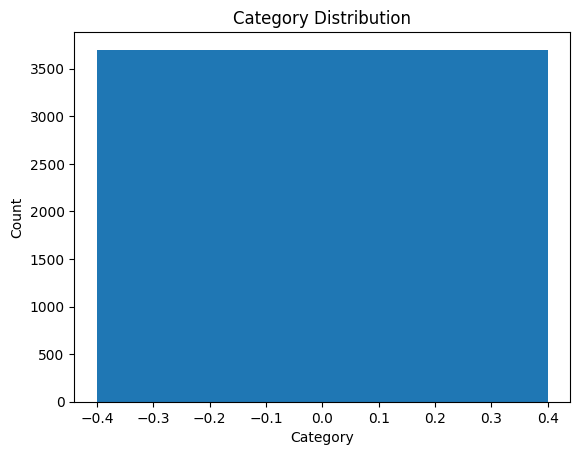

In [ ]:
import matplotlib.pyplot as plt
category_counts = df['label'].value_counts()

# Plot the bar graph
plt.bar(category_counts.index, category_counts.values)

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')

# Show the plot
plt.show()

In [ ]:
df.shape

(3700, 3)

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'reviews', 'label'], dtype='object')


**Dataset** **class**

In [ ]:
class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
            self.texts = texts
            self.labels = labels
            self.tokenizer = tokenizer
            self.max_length = max_length
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        return {'input_ids': encoding['input_ids'].flatten(), 'attention_mask': encoding['attention_mask'].flatten(), 'label': torch.tensor(label)}


**Setting Up BERT model for Fine-tuning**

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1);
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = self.dropout(pooled_output)
        logits = self.fc(x)
        return logits

In [ ]:
def train(model, data_loader, optimizer, scheduler, device):
    model.train()
    for batch in data_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

In [ ]:
def evaluate(model, data_loader, device):
    model.eval()
    predictions = []
    actual_labels = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)#Perfoms forward Pass
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())
    return accuracy_score(actual_labels, predictions), classification_report(actual_labels, predictions)

In [ ]:

def predict_sentiment(text, model, tokenizer, device, max_length=128):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)  # Assuming logits is the output of your model
    label = preds.item()

    if label == 2:
        return "Positive Tweet"
    elif label == 1:
        return "Neutral Tweet"
    elif label == 0:
        return "Negative Tweet"
    else:
        return "Unknown Label"



In [ ]:
# Set up parameters
bert_model_name = 'bert-base-uncased'
num_classes = 3
max_length = 120
batch_size = 16
num_epochs = 2
learning_rate = 2e-5

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [ ]:
# Specify a cache directory for the tokenizer
tokenizer = BertTokenizer.from_pretrained(bert_model_name, cache_dir="/path/to/cache/directory")

train_dataset = TextClassificationDataset(train_texts, train_labels, tokenizer, max_length)
val_dataset = TextClassificationDataset(val_texts, val_labels, tokenizer, max_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BERTClassifier(bert_model_name, num_classes).to(device)

In [ ]:
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        train(model, train_dataloader, optimizer, scheduler, device)
        accuracy, report = evaluate(model, val_dataloader, device)
        print(f"Validation Accuracy: {accuracy:.4f}")
        print(report)

Epoch 1/2
Validation Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740

    accuracy                           1.00       740
   macro avg       1.00      1.00      1.00       740
weighted avg       1.00      1.00      1.00       740

Epoch 2/2
Validation Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740

    accuracy                           1.00       740
   macro avg       1.00      1.00      1.00       740
weighted avg       1.00      1.00      1.00       740



In [ ]:
torch.save(model.state_dict(), "bert_classifier_three_labeled1.pth")

In [ ]:


# Load the data into the df_reviews variable
df_reviews = pd.read_csv('/content/data/BA_reviews[1].csv')
# Rename the 'Unnamed: 0' column to 'label'
df_reviews = df_reviews.rename(columns={'Unnamed: 0': 'label'})

# Check if the 'label' column is now present
print(df_reviews.columns)
print(df_reviews.columns)
# Select the negative reviews
neg = df_reviews[df_reviews['label'] == 1]
neg

Index(['label', 'reviews'], dtype='object')
Index(['label', 'reviews'], dtype='object')


,label,reviews
1,1,✅ Trip Verified | Overall I would say disapp...


In [ ]:
# Check if the 'label' column exists
if 'label' not in df_reviews.columns:
    # Check for similar column names
    similar_columns = [col for col in df_reviews.columns if col.lower() == 'label']
    if similar_columns:
        # Update the code with the correct column name
        df_reviews = df_reviews.rename(columns={similar_columns[0]: 'label'})
    else:
        print("Error: 'label' column not found in the DataFrame.")

# Select the negative reviews
pos= df_reviews[df_reviews['label'] == 0]
pos

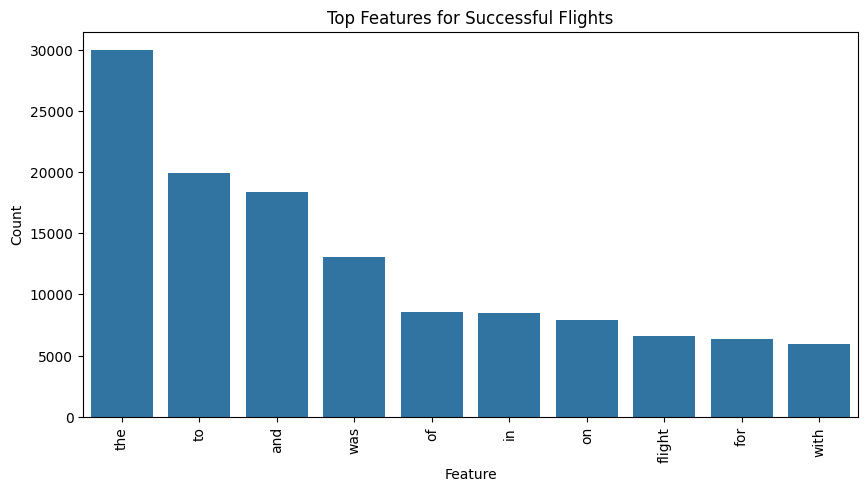

In [ ]:
# prompt: give me a plot of top features that can drive successful flight

import pandas as pd
import matplotlib.pyplot as plt
# Assuming the reviews are stored in a variable called 'reviews'
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews)
feature_names = vectorizer.get_feature_names_out()
top_features = sorted(zip(feature_names, X.sum(axis=0).getA1()), key=lambda x: x[1], reverse=True)[:10]
top_features_df = pd.DataFrame(top_features, columns=['Feature', 'Count'])
plt.figure(figsize=(10, 5))
sns.barplot(data=top_features_df, x='Feature', y='Count')
plt.xticks(rotation=90)
plt.title('Top Features for Successful Flights')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()


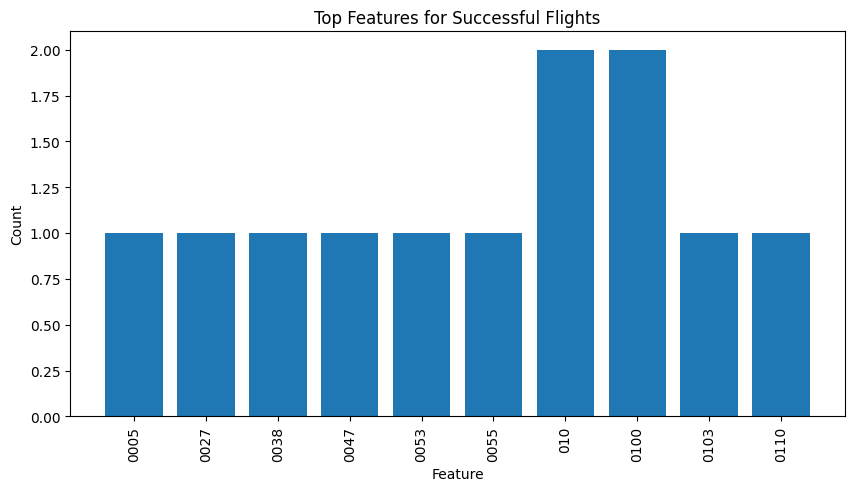

In [ ]:
# prompt: bargraphs for review

import matplotlib.pyplot as plt
# Assuming the reviews are stored in a variable called 'reviews'
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews)
feature_names = vectorizer.get_feature_names_out()

# Calculate the frequency of each feature
feature_counts = X.sum(axis=0).getA1()

# Create a bar plot of the top 10 most frequent features
plt.figure(figsize=(10, 5))
plt.bar(feature_names[:10], feature_counts[:10])
plt.xticks(rotation=90)
plt.title('Top Features for Successful Flights')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()


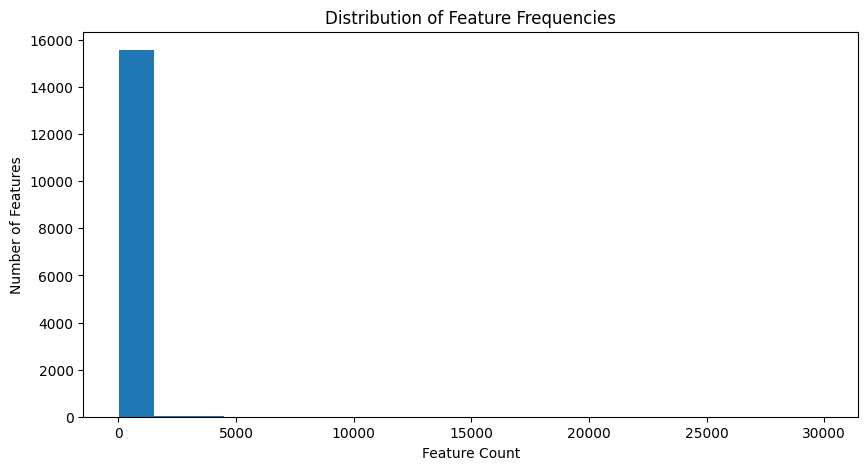

In [ ]:
# prompt: histograph for it

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(feature_counts, bins=20)
plt.title('Distribution of Feature Frequencies')
plt.xlabel('Feature Count')
plt.ylabel('Number of Features')
plt.show()


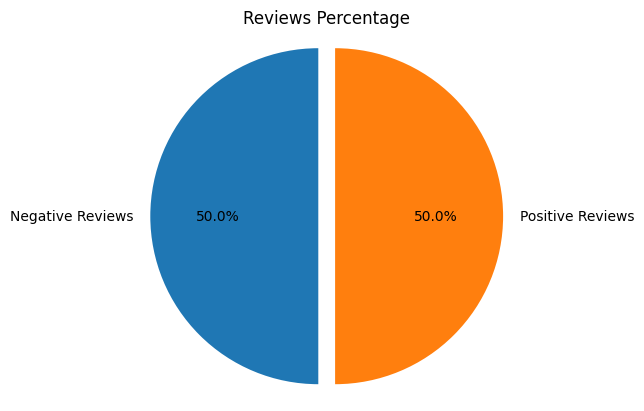

In [ ]:
# prompt: pie chart for it, i should get reviews percentage of 0 and 1 only

import matplotlib.pyplot as plt
# Calculate the percentage of reviews with label 0 and 1
percentage_0 = df_reviews['label'].value_counts()[0] / len(df_reviews) * 100
percentage_1 = df_reviews['label'].value_counts()[1] / len(df_reviews) * 100

# Create a pie chart
labels = ['Negative Reviews', 'Positive Reviews']
sizes = [percentage_0, percentage_1]
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Reviews Percentage')

plt.show()


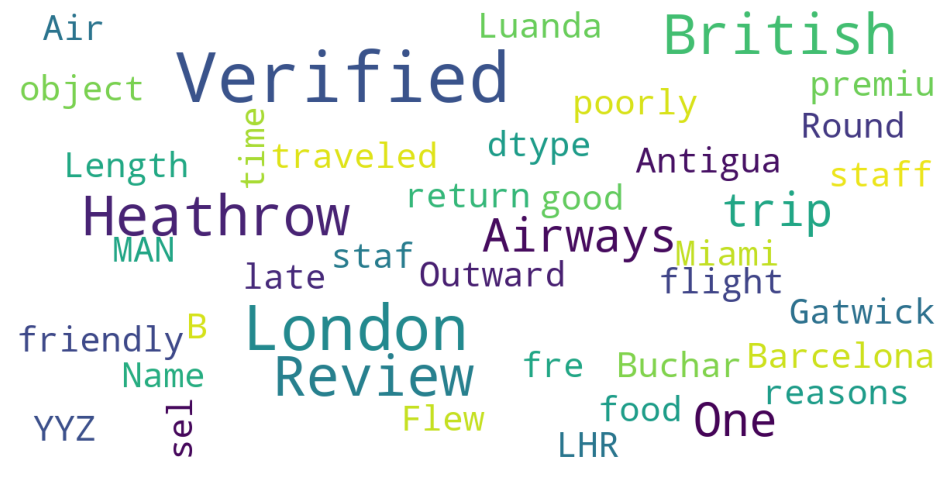

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.reviews)